<a id="top"></a>

The purpose of this notebook is to create a dataset containing LINEID, ROUTEID, PROGRNUMBER & STOPPOINTID and to gain a better understanding of this data.

***

# Import Packages

In [165]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import json

***

<a id="contents"></a>
# Contents

- [1. Connect to Database](#connect_to_db)
- [2. Query Database](#query_db)
- [3. Data Overview](#data_overview)
- [4. A Look at Line 1](#look_at_line_1)
- [5. Create Stops Dictionary](#create_stops_dictionary)
- [6. Create Stops % Travel Time Dictionary](#stop_pct_dictionary)
- [7. Line Route IDs](#line_routes)
- [8. Stop Dwell Times](#stop_dwelltimes)

***

<a id="connect_to_db"></a>
# 1. Connect to Database
[Back to contents](#contents)

In [2]:
# def function to create connection to db
def create_connection(db_file):
    """
    create a database connection to the SQLite database specified by db_file
    :param df_file: database file
    :return: Connection object or None
    """
    conn = None
    try: 
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
        
    return conn

In [3]:
# create connection to database
db = '/home/faye/Data-Analytics-CityRoute/dublinbus.db'
conn = create_connection(db)

***

<a id="query_db"></a>
# 2. Query Database
[Back to contents](#contents)

In [4]:
# initialise query
query = """
SELECT DISTINCT T.LINEID, T.ROUTEID, T.DIRECTION, L.PROGRNUMBER, L.STOPPOINTID
FROM leavetimes L, trips T
WHERE L.TRIPID = T.TRIPID
"""

In [5]:
df_query = pd.read_sql(query, conn)

***

<a id="data_overview"></a>
# 3. Data Overview
[Back to contents](#contents)

In [6]:
# print number of rows
rows = df_query.shape[0]
print(f"There are {rows} rows in this dataset.")

There are 30649 rows in this dataset.


In [7]:
# print first 5 rows
print("The first 5 rows:")
df_query.head(5)

The first 5 rows:


,LINEID,ROUTEID,DIRECTION,PROGRNUMBER,STOPPOINTID
0,14,14_15,1,1,248
1,14,14_15,1,2,249
2,14,14_15,1,3,250
3,14,14_15,1,4,251
4,14,14_15,1,5,252


In [8]:
# print last 5 rows
print("The last 5 rows:")
df_query.tail(5)

The last 5 rows:


,LINEID,ROUTEID,DIRECTION,PROGRNUMBER,STOPPOINTID
30644,41X,41X_131,1,6,772
30645,41X,41X_131,1,7,773
30646,46A,46A_65,2,16,7688
30647,41,41_22,1,28,7685
30648,41B,41B_58,1,29,3671


In [9]:
# print feature datatypes
print("Feature datatypes")
print("-"*25)
print(df_query.dtypes)

Feature datatypes
-------------------------
LINEID         object
ROUTEID        object
DIRECTION       int64
PROGRNUMBER    object
STOPPOINTID    object
dtype: object


In [10]:
# change datatype of PROGRNUMBER
df_query['PROGRNUMBER'] = df_query['PROGRNUMBER'].astype('int64')
print(f"The datatype of PROGRNUMBER is now {df_query['PROGRNUMBER'].dtype}")

The datatype of PROGRNUMBER is now int64


In [11]:
# print the number of routes for each line
routes_per_line = {} #dictionary of lines and the number of routes they have
lines = df_query['LINEID'].unique()
lines.sort()
print("The number of routes for each line")
print("-"*50)
routes_total = 0
for line in lines:
    routes = df_query[df_query['LINEID'] == line]['ROUTEID'].unique()
    print(f"Line {line:3} has {len(routes):2} routes.")
    routes_total += len(routes)
    routes_per_line[line] = len(routes) #add details to dictionary

print()
print("-"*50)
print(f"There is an average of {routes_total // len(lines)} routes for each line.")

The number of routes for each line
--------------------------------------------------
Line 1   has  5 routes.
Line 102 has  3 routes.
Line 104 has  2 routes.
Line 11  has  4 routes.
Line 111 has  4 routes.
Line 114 has  2 routes.
Line 116 has  2 routes.
Line 118 has  2 routes.
Line 120 has  7 routes.
Line 122 has  8 routes.
Line 123 has  4 routes.
Line 13  has 18 routes.
Line 130 has  2 routes.
Line 14  has  4 routes.
Line 140 has  5 routes.
Line 142 has  5 routes.
Line 145 has 15 routes.
Line 14C has  3 routes.
Line 15  has  6 routes.
Line 150 has  3 routes.
Line 151 has  5 routes.
Line 15A has  3 routes.
Line 15B has  4 routes.
Line 15D has  3 routes.
Line 16  has  5 routes.
Line 161 has  3 routes.
Line 16C has  4 routes.
Line 16D has  1 routes.
Line 17  has 10 routes.
Line 17A has  8 routes.
Line 18  has  3 routes.
Line 184 has  2 routes.
Line 185 has 14 routes.
Line 220 has  4 routes.
Line 236 has  2 routes.
Line 238 has  3 routes.
Line 239 has  2 routes.
Line 25  has  2 routes.
Li

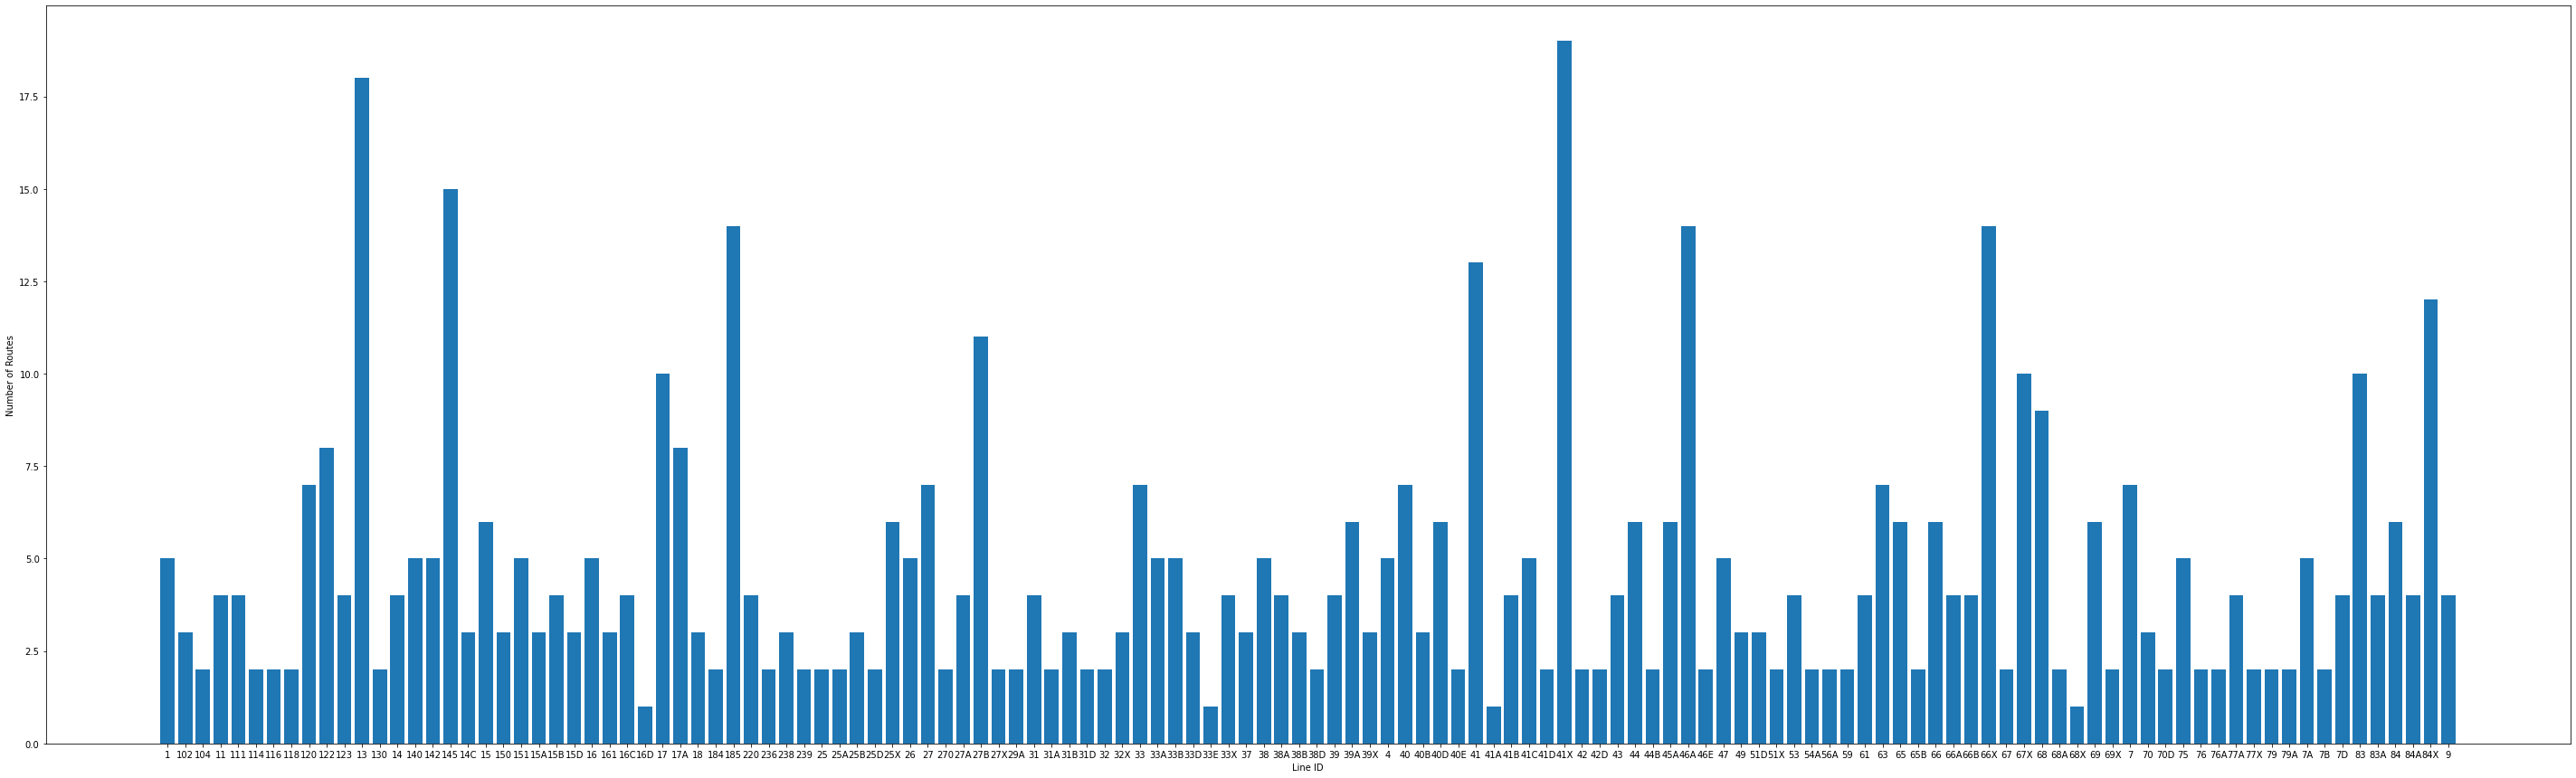

In [12]:
# plot number of routes per line
keys = routes_per_line.keys()
values = routes_per_line.values()

fig, ax = plt.subplots(figsize=(50, 15)) # set the size
plt.bar(keys, values)

ax.set_ylabel('Number of Routes')
ax.set_xlabel('Line ID')

fig.show()

> There are a few lines that have a significant number of routes but most appear to have around 4 routes.

In [13]:
# print details for each line
lines = df_query.sort_values('LINEID')['LINEID'].unique()
for line in lines:
    print()
    print(f"Line {line:3}")
    
    routes = df_query[df_query['LINEID'] == line]['ROUTEID'].unique()
    num_routes = len(routes)
    print(f"\tThis line has {num_routes} routes.")
    
    for route in routes:
        #print()
        print(f"\tRoute: {route:6}")
        print(f"\t\tDirection: {df_query[df_query['ROUTEID'] == route]['DIRECTION'].unique()}")
        stops = df_query[df_query['ROUTEID'] == route]['STOPPOINTID'].to_list()
        print(f"\t\tThis routes has {len(stops):2} stops")
        #print(f"\t\tStops: {stops}")
    
    print("~"*50)


Line 1  
	This line has 5 routes.
	Route: 1_40  
		Direction: [2]
		This routes has 43 stops
	Route: 1_37  
		Direction: [1]
		This routes has 42 stops
	Route: 1_39  
		Direction: [1]
		This routes has 23 stops
	Route: 1_41  
		Direction: [2]
		This routes has 22 stops
	Route: 1_38  
		Direction: [1]
		This routes has 21 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 102
	This line has 3 routes.
	Route: 102_10
		Direction: [2]
		This routes has 31 stops
	Route: 102_8 
		Direction: [1]
		This routes has 53 stops
	Route: 102_9 
		Direction: [2]
		This routes has 54 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 104
	This line has 2 routes.
	Route: 104_15
		Direction: [1]
		This routes has 56 stops
	Route: 104_16
		Direction: [2]
		This routes has 47 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 11 
	This line has 4 routes.
	Route: 11_42 
		Direction: [2]
		This routes has 66 stops
	Route: 11_40 
		Direction: [1]
		This routes has 61 stops

		Direction: [1]
		This routes has 20 stops
	Route: 16C_27
		Direction: [1]
		This routes has 23 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 16D
	This line has 1 routes.
	Route: 16D_30
		Direction: [1]
		This routes has 72 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 17 
	This line has 10 routes.
	Route: 17_17 
		Direction: [2]
		This routes has 108 stops
	Route: 17_10 
		Direction: [1]
		This routes has 83 stops
	Route: 17_15 
		Direction: [2]
		This routes has 120 stops
	Route: 17_19 
		Direction: [1]
		This routes has 51 stops
	Route: 17_13 
		Direction: [1]
		This routes has 57 stops
	Route: 17_14 
		Direction: [1]
		This routes has 63 stops
	Route: 17_18 
		Direction: [2]
		This routes has 108 stops
	Route: 17_11 
		Direction: [1]
		This routes has 66 stops
	Route: 17_16 
		Direction: [2]
		This routes has 65 stops
	Route: 17_12 
		Direction: [1]
		This routes has 14 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 17A
	This line 

		This routes has 76 stops
	Route: 31B_44
		Direction: [1]
		This routes has 68 stops
	Route: 31B_45
		Direction: [2]
		This routes has 54 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 31D
	This line has 2 routes.
	Route: 31D_51
		Direction: [2]
		This routes has 36 stops
	Route: 31D_50
		Direction: [1]
		This routes has 32 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 32 
	This line has 2 routes.
	Route: 32_58 
		Direction: [2]
		This routes has 59 stops
	Route: 32_57 
		Direction: [1]
		This routes has 57 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 32X
	This line has 3 routes.
	Route: 32X_74
		Direction: [1]
		This routes has 45 stops
	Route: 32X_76
		Direction: [2]
		This routes has 55 stops
	Route: 32X_77
		Direction: [1]
		This routes has 45 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 33 
	This line has 7 routes.
	Route: 33_70 
		Direction: [2]
		This routes has 194 stops
	Route: 33_44 
		Direction: [1]
		This

		This routes has 56 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 41C
	This line has 5 routes.
	Route: 41C_79
		Direction: [2]
		This routes has 61 stops
	Route: 41C_78
		Direction: [1]
		This routes has 60 stops
	Route: 41C_80
		Direction: [2]
		This routes has 42 stops
	Route: 41C_83
		Direction: [1]
		This routes has 60 stops
	Route: 41C_84
		Direction: [2]
		This routes has 60 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 41D
	This line has 2 routes.
	Route: 41D_26
		Direction: [1]
		This routes has 40 stops
	Route: 41D_27
		Direction: [2]
		This routes has 42 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 41X
	This line has 19 routes.
	Route: 41X_110
		Direction: [2]
		This routes has 38 stops
	Route: 41X_120
		Direction: [2]
		This routes has 38 stops
	Route: 41X_119
		Direction: [2]
		This routes has 32 stops
	Route: 41X_116
		Direction: [1]
		This routes has 51 stops
	Route: 41X_109
		Direction: [2]
		This routes has 28 stops
	

	This line has 2 routes.
	Route: 67_4  
		Direction: [1]
		This routes has 69 stops
	Route: 67_6  
		Direction: [2]
		This routes has 65 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 67X
	This line has 10 routes.
	Route: 67X_42
		Direction: [2]
		This routes has 55 stops
	Route: 67X_41
		Direction: [2]
		This routes has 56 stops
	Route: 67X_38
		Direction: [1]
		This routes has 70 stops
	Route: 67X_40
		Direction: [1]
		This routes has 43 stops
	Route: 67X_39
		Direction: [1]
		This routes has 67 stops
	Route: 67X_46
		Direction: [2]
		This routes has 55 stops
	Route: 67X_44
		Direction: [1]
		This routes has 69 stops
	Route: 67X_43
		Direction: [1]
		This routes has 71 stops
	Route: 67X_45
		Direction: [1]
		This routes has 43 stops
	Route: 67X_47
		Direction: [2]
		This routes has 54 stops
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Line 68 
	This line has 9 routes.
	Route: 68_80 
		Direction: [1]
		This routes has 71 stops
	Route: 68_85 
		Direction: [2]
		T

> It appears that each route has only one direction

***

<a id="look_at_line_1"></a>
# 4. A Look at Line 1
[Back to contents](#contents)

In [14]:
# create a df of line ID = 1
line_1 = df_query[df_query['LINEID'] == '1']

In [15]:
# Sort values of df
line_1 = line_1.sort_values(['ROUTEID', 'DIRECTION', 'PROGRNUMBER'])

In [16]:
# print first 10 rows
line_1.head(10)

,LINEID,ROUTEID,DIRECTION,PROGRNUMBER,STOPPOINTID
9180,1,1_37,1,1,226
9181,1,1_37,1,2,228
9182,1,1_37,1,3,229
9183,1,1_37,1,4,227
9184,1,1_37,1,5,230
9185,1,1_37,1,6,231
9186,1,1_37,1,7,1641
9187,1,1_37,1,8,1642
9188,1,1_37,1,9,213
9189,1,1_37,1,10,214


In [17]:
# create list of line 1 routes
line_1_routes = line_1['ROUTEID'].unique()

In [18]:
# print the direction for each route for line 1
print("Direction of each route for line 1:")
for r in line_1_routes:
    print(r, line_1[line_1['ROUTEID'] == r]['DIRECTION'].unique())

Direction of each route for line 1:
1_37 [1]
1_38 [1]
1_39 [1]
1_40 [2]
1_41 [2]


In [19]:
# print the number of stops for each route for line 1
print("Number of stops for each route for line 1:")
for r in line_1_routes:
    num_stops = len(line_1[line_1['ROUTEID'] == r]['STOPPOINTID'])
    print(r, "[" + str(num_stops) + "]")

Number of stops for each route for line 1:
1_37 [42]
1_38 [21]
1_39 [23]
1_40 [43]
1_41 [22]


In [99]:
l1 = line_1[line_1['ROUTEID'] == '1_40']['STOPPOINTID'].to_list()
l2 = line_1[line_1['ROUTEID'] == '1_37']['STOPPOINTID'].to_list()

for i in range(len(l1)):
    print(l1[i], end=" ")
    try: 
        print(l2[i])
    except:
        pass

#list(set(l1).symmetric_difference(set(l2)))

#len(list(set(l1).symmetric_difference(set(l2))))


381 381
382 382
4451 4451
383 383
384 384
385 385
387 387
388 388
389 389
393 393
371 371
391 391
392 392
395 395
396 396
397 397
398 398
399 399
400 400
319 319
278 278
7615 7615
10 12 14 15 17 18 19 21 7602 85 203 204 205 1620 220 221 222 223 224 225 226 

In [100]:
[1,2] == [2,1]

False

***

<a id="create_stops_dictionary"></a>
# 5. Create Stops Dictionary
[Back to contents](#contents)

Initial approach

In [52]:
# sort the lines, routes, and progrnumber
df_query = df_query.sort_values(['LINEID', 'ROUTEID', 'PROGRNUMBER'])

In [81]:
# initialise the dictionary
stops_dict = {}

In [82]:
# create dictionary
lines = df_query['LINEID'].unique()
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique()
    
    for r in line_routes:
        rd = {} # create a route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        
        # create a dictionary where (key:value) is ('PROGRNUMBER':'STOPPOINTID')
        rd = pd.Series(df_query[df_query['ROUTEID'] == r].STOPPOINTID.values,index=df_query[df_query['ROUTEID'] == r].PROGRNUMBER).to_dict()
        
        rd['direction'] = d #add direction to dict
        ld[r] = rd
    
    stops_dict[l] = ld

In [114]:
stops_dict['46A']['46A_62'].values()

dict_values(['2060', '2061', '2062', '2063', '2064', '2065', '4727', '4728', '461', '2068', '2069', '2070', '2084', '768', '769', '770', '771', '772', '773', '774', '775', '776', '777', '906', '907', '908', '909', '786', '792', '320', '7491', '278', '2', 2])

New approach

In [ ]:
# stops_dict =
# {
#     lineID : { outbound : [stops], inbound : [stops] },
#     lineID : { outbound : [stops], inbound : [stops] },
#     lineID : { outbound : [stops], inbound : [stops] },
# }

In [155]:
# initialise dictionary
stops_dict = {}

In [156]:
# create dictionary
lines = df_query['LINEID'].unique()
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique() # get list of routes
    
    # initial stops counts
    num_outbound_stops = 0
    num_inbound_stops = 0
    
    for r in line_routes:
        
        rd = {} # initialise route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        num_route_stops = len(df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()) # find number of stops
        
        if d == 1:
            
            # compare number of stops
            if num_route_stops > num_outbound_stops:
                # add dict
                ld['outbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                
                # change num_outbound_stops
                num_outbound_stops = num_route_stops

        else:
            
            # compare number of stops
            if num_route_stops > num_inbound_stops:
                
                # add dict
                ld['inbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                
                # change num_outbound_stops
                num_inbound_stops = num_route_stops
    
    stops_dict[l] = ld # add line dictionary to stops dictionary

In [166]:
# save dictionary as json
with open('/home/faye/data/routes_and_stops.json', 'w') as fp:
    json.dump(stops_dict, fp)

***

Get routeIDs for line 46A

In [175]:
# create dictionary
dict_46a = {}
lines = ['46A']
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique() # get list of routes
    
    # initial stops counts
    num_outbound_stops = 0
    num_inbound_stops = 0
    
    for r in line_routes:
        
        rd = {} # initialise route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        num_route_stops = len(df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()) # find number of stops
        
        if d == 1:
            
            # compare number of stops
            if num_route_stops > num_outbound_stops:
                # add dict
                #ld['outbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                ld['outbound'] = r
                
                # change num_outbound_stops
                num_outbound_stops = num_route_stops

        else:
            
            # compare number of stops
            if num_route_stops > num_inbound_stops:
                
                # add dict
                #ld['inbound'] = df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()
                ld['inbound'] = r
                
                # change num_outbound_stops
                num_inbound_stops = num_route_stops
    
    dict_46a[l] = ld # add line dictionary to stops dictionary

In [176]:
dict_46a

{'46A': {'inbound': '46A_67', 'outbound': '46A_74'}}

In [180]:
len(stops_dict['46A']['outbound'])

59

In [181]:
stops_dict['46A']['outbound']

['807',
 '808',
 '809',
 '810',
 '811',
 '812',
 '813',
 '814',
 '81',
 '817',
 '818',
 '819',
 '264',
 '6059',
 '334',
 '406',
 '747',
 '842',
 '845',
 '846',
 '847',
 '848',
 '2795',
 '756',
 '757',
 '758',
 '759',
 '760',
 '761',
 '762',
 '763',
 '2007',
 '2008',
 '2009',
 '2010',
 '435',
 '7353',
 '4571',
 '2013',
 '2014',
 '4636',
 '2016',
 '2015',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '4565',
 '4566',
 '4567',
 '2031',
 '2032',
 '2033',
 '2034',
 '2035',
 '2036',
 '2039']

In [182]:
stops_dict

{'1': {'outbound': ['226',
   '228',
   '229',
   '227',
   '230',
   '231',
   '1641',
   '1642',
   '213',
   '214',
   '4432',
   '119',
   '44',
   '7603',
   '45',
   '46',
   '47',
   '48',
   '49',
   '51',
   '52',
   '265',
   '271',
   '340',
   '350',
   '351',
   '352',
   '353',
   '354',
   '355',
   '356',
   '357',
   '390',
   '372',
   '373',
   '374',
   '375',
   '2804',
   '376',
   '377',
   '378',
   '380'],
  'inbound': ['381',
   '382',
   '4451',
   '383',
   '384',
   '385',
   '387',
   '388',
   '389',
   '393',
   '371',
   '391',
   '392',
   '395',
   '396',
   '397',
   '398',
   '399',
   '400',
   '319',
   '278',
   '7615',
   '10',
   '12',
   '14',
   '15',
   '17',
   '18',
   '19',
   '21',
   '7602',
   '85',
   '203',
   '204',
   '205',
   '1620',
   '220',
   '221',
   '222',
   '223',
   '224',
   '225',
   '226']},
 '102': {'inbound': ['7348',
   '3669',
   '3671',
   '3672',
   '3078',
   '3087',
   '6033',
   '3089',
   '3090',
   '3706',

***

<a id="stop_pct_dictionary"></a>
# 6. Create Stop % Travel Time Dictionary
[Back to contents](#contents)

## 6.1. Basic Version - Based on Number of Stops

In [219]:
# get % of route travel time based off total number of stops
new_stops_dict = stops_dict
for r in new_stops_dict:
    
    #print(r)
    #print(new_stops_dict[r])
    
    for d in new_stops_dict[r]:
        
        #print(d)
        stops = new_stops_dict[r][d]
        #print(stops)
    
        total = len(stops)
        #print(total)

        new_dict = {}
        count = 1
        
        for s in stops:

            #print("{:4} : {:>5.2f}" .format(s, (count/total * 100)))
            new_dict[s] = (count/total * 100)
            count+=1
            
        new_stops_dict[r][d] = new_dict
        

In [220]:
new_stops_dict

{'1': {'outbound': {'226': 2.380952380952381,
   '228': 4.761904761904762,
   '229': 7.142857142857142,
   '227': 9.523809523809524,
   '230': 11.904761904761903,
   '231': 14.285714285714285,
   '1641': 16.666666666666664,
   '1642': 19.047619047619047,
   '213': 21.428571428571427,
   '214': 23.809523809523807,
   '4432': 26.190476190476193,
   '119': 28.57142857142857,
   '44': 30.952380952380953,
   '7603': 33.33333333333333,
   '45': 35.714285714285715,
   '46': 38.095238095238095,
   '47': 40.476190476190474,
   '48': 42.857142857142854,
   '49': 45.23809523809524,
   '51': 47.61904761904761,
   '52': 50.0,
   '265': 52.38095238095239,
   '271': 54.761904761904766,
   '340': 57.14285714285714,
   '350': 59.523809523809526,
   '351': 61.904761904761905,
   '352': 64.28571428571429,
   '353': 66.66666666666666,
   '354': 69.04761904761905,
   '355': 71.42857142857143,
   '356': 73.80952380952381,
   '357': 76.19047619047619,
   '390': 78.57142857142857,
   '372': 80.95238095238095,

In [221]:
# save dictionary as json
with open('/home/faye/data/stop_time_pct.json', 'w') as fp:
    json.dump(stops_dict, fp)

## 6.2. Based on Travel Time

***

<a id="line_routes"></a>
# 7. Line Route IDs
[Back to contents](#contents)

In [222]:
# create dictionary
route_lines = {}

lines = df_query['LINEID'].unique()
for l in lines:
    
    ld = {} # create a line dict
    line_routes = df_query[df_query['LINEID'] == l]['ROUTEID'].unique() # get list of routes
    
    # initial stops counts
    num_outbound_stops = 0
    num_inbound_stops = 0
    
    for r in line_routes:
        
        rd = {} # initialise route dict
        d = df_query[df_query['ROUTEID'] == r]['DIRECTION'].unique()[0] #get direction
        num_route_stops = len(df_query[df_query['ROUTEID'] == r].STOPPOINTID.to_list()) # find number of stops
        
        if d == 1:
            
            # compare number of stops
            if num_route_stops > num_outbound_stops:
                # add dict
                ld['outbound'] = r
                
                # change num_outbound_stops
                num_outbound_stops = num_route_stops

        else:
            
            # compare number of stops
            if num_route_stops > num_inbound_stops:
                
                # add dict
                ld['inbound'] = r
                
                # change num_outbound_stops
                num_inbound_stops = num_route_stops
    
    route_lines[l] = ld # add line dictionary to stops dictionary

In [225]:
# save dictionary as json
with open('/home/faye/data/line_routes.json', 'w') as fp:
    json.dump(route_lines, fp)

***

<a id="stop_dwelltimes"></a>
# 8. Stop Dwell Times
[Back to contents](#contents)

***

[Back to top](#top)